<a href="https://colab.research.google.com/github/devbernardes/Telecom-X/blob/main/telecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EXTRAÇÃO DOS DADOS**

In [5]:
import pandas as pd
import requests

# 1. URL para os dados brutos
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json'

# 2. Fazendo a requisição e obtendo os dados
response = requests.get(url)
dados_json = response.json()

# 3. Usar json_normalize para "achatar" os dados e criar o DataFrame
df = pd.json_normalize(dados_json)

# 4. Verificar o resultado
print("DataFrame 'achatado' com sucesso! ✅")
print("\nNovas colunas do DataFrame:")
print(df.columns)

print("\nAs 5 primeiras linhas do DataFrame corrigido:")
display(df.head())

DataFrame 'achatado' com sucesso! ✅

Novas colunas do DataFrame:
Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

As 5 primeiras linhas do DataFrame corrigido:


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# **Explorar a Estrutura e os Tipos de Dados**

In [6]:
print("--- Análise da Estrutura do DataFrame ---")
df.info()

print("\n--- Verificando as Dimensões (Linhas, Colunas) ---")
print(df.shape)

--- Análise da Estrutura do DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  intern

In [7]:
print(df.columns)


Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')


# **Verificando Inconsistências nos Dados**

**Corrigindo Erros de Formatação**

In [12]:
print("Tipo de dado de 'account.Charges.Total' ANTES da conversão:", df['account.Charges.Total'].dtype)

# Converter a coluna para numérico.
# errors='coerce' transforma valores problemáticos (ex: " ") em NaN (Not a Number)
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

print("Tipo de dado de 'account.Charges.Total' DEPOIS da conversão:", df['account.Charges.Total'].dtype)

Tipo de dado de 'account.Charges.Total' ANTES da conversão: float64
Tipo de dado de 'account.Charges.Total' DEPOIS da conversão: float64


**Tratando Valores Ausentes (NaN)**

In [13]:
# Verificar a quantidade de valores ausentes em cada coluna
print("\n--- Contagem de Valores Ausentes por Coluna ---")
print(df.isnull().sum())


--- Contagem de Valores Ausentes por Coluna ---
customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
account.Charges.Monthly       0
account.Charges.Total        11
dtype: int64


In [14]:
# Removendo as linhas com valores ausentes
print(f"\nTamanho do DataFrame ANTES de remover os nulos: {df.shape}")
df.dropna(inplace=True)
print(f"Tamanho do DataFrame DEPOIS de remover os nulos: {df.shape}")

# Verificação final de valores ausentes
print("\n--- Verificação Final de Valores Ausentes ---")
print(df.isnull().sum().any()) # Retornará False se não houver mais nenhum valor nulo


Tamanho do DataFrame ANTES de remover os nulos: (7267, 21)
Tamanho do DataFrame DEPOIS de remover os nulos: (7256, 21)

--- Verificação Final de Valores Ausentes ---
False


**Verificando Dados Duplicados**

In [15]:
# Contar a quantidade de linhas duplicadas
duplicatas = df.duplicated().sum()
print(f"\n--- Verificação de Duplicatas ---")
print(f"Quantidade de linhas duplicadas encontradas: {duplicatas}")

# Se houvesse duplicatas, o comando para removê-las seria:
# df.drop_duplicates(inplace=True)


--- Verificação de Duplicatas ---
Quantidade de linhas duplicadas encontradas: 0


**Verificando Inconsistências nas Categorias**

In [16]:
# Selecionando apenas as colunas do tipo 'object' (texto)
colunas_categoricas = df.select_dtypes(include=['object']).columns

print("\n--- Verificando Valores Únicos nas Colunas Categóricas ---")
for coluna in colunas_categoricas:
    # Ignorar a customerID pois cada valor é único
    if coluna != 'customerID':
        print(f"Coluna '{coluna}': {df[coluna].unique()}")


--- Verificando Valores Únicos nas Colunas Categóricas ---
Coluna 'Churn': ['No' 'Yes' '']
Coluna 'customer.gender': ['Female' 'Male']
Coluna 'customer.Partner': ['Yes' 'No']
Coluna 'customer.Dependents': ['Yes' 'No']
Coluna 'phone.PhoneService': ['Yes' 'No']
Coluna 'phone.MultipleLines': ['No' 'Yes' 'No phone service']
Coluna 'internet.InternetService': ['DSL' 'Fiber optic' 'No']
Coluna 'internet.OnlineSecurity': ['No' 'Yes' 'No internet service']
Coluna 'internet.OnlineBackup': ['Yes' 'No' 'No internet service']
Coluna 'internet.DeviceProtection': ['No' 'Yes' 'No internet service']
Coluna 'internet.TechSupport': ['Yes' 'No' 'No internet service']
Coluna 'internet.StreamingTV': ['Yes' 'No' 'No internet service']
Coluna 'internet.StreamingMovies': ['No' 'Yes' 'No internet service']
Coluna 'account.Contract': ['One year' 'Month-to-month' 'Two year']
Coluna 'account.PaperlessBilling': ['Yes' 'No']
Coluna 'account.PaymentMethod': ['Mailed check' 'Electronic check' 'Credit card (automatic

# **Coluna de Contas Diárias**

In [18]:
# com o DataFrame 'df' já limpo e carregado

# Passo 1: Definir o número médio de dias em um mês
DIAS_NO_MES = 30.44

# Passo 2: Confirmar o nome exato da coluna de faturamento mensal

# print(df.columns)
coluna_faturamento_mensal = 'account.Charges.Monthly'

# Passo 3: Criar a nova coluna "Contas_Diarias"

# A operação é feita de forma vetorizada, ou seja, o Pandas aplica a divisão em todas as linhas de uma vez.
df['Contas_Diarias'] = df[coluna_faturamento_mensal] / DIAS_NO_MES

# Passo 4: Verificar o resultado
print("Coluna 'Contas_Diarias' criada com sucesso! ✅")

# Exibir a coluna original e a nova coluna para comparação (Isso ajuda a validar se o cálculo faz sentido.)

print("\nExibindo as primeiras 5 linhas com os valores mensais e diários:")
display(df[[coluna_faturamento_mensal, 'Contas_Diarias']].head())

Coluna 'Contas_Diarias' criada com sucesso! ✅

Exibindo as primeiras 5 linhas com os valores mensais e diários:


,account.Charges.Monthly,Contas_Diarias
0,65.6,2.155059
1,59.9,1.967806
2,73.9,2.427727
3,98.0,3.219448
4,83.9,2.756242


# **Padronização e Transformação de Dados**

**Renomeando Colunas para Maior Clareza**

In [29]:
# Dicionário para mapear os nomes antigos para os novos
mapa_colunas = {
    'customerID': 'ID_Cliente',
    'customer.gender': 'Genero',
    'customer.SeniorCitizen': 'Idoso',
    'customer.Partner': 'Possui_Parceiro',
    'customer.Dependents': 'Possui_Dependentes',
    'customer.tenure': 'Meses_Contrato',
    'phone.PhoneService': 'Servico_Telefonico',
    'phone.MultipleLines': 'Multiplas_Linhas',
    'internet.InternetService': 'Servico_Internet',
    'internet.OnlineSecurity': 'Seguranca_Online',
    'internet.OnlineBackup': 'Backup_Online',
    'internet.DeviceProtection': 'Protecao_Dispositivo',
    'internet.TechSupport': 'Suporte_Tecnico',
    'internet.StreamingTV': 'Streaming_TV',
    'internet.StreamingMovies': 'Streaming_Filmes',
    'account.Contract': 'Tipo_Contrato',
    'account.PaperlessBilling': 'Fatura_Sem_Papel',
    'account.PaymentMethod': 'Metodo_Pagamento',
    'account.Charges.Monthly': 'Cobranca_Mensal',
    'account.Charges.Total': 'Cobranca_Total',
    'Churn': 'Evasao',
}

# Renomear as colunas usando o dicionário
df.rename(columns=mapa_colunas, inplace=True)

# Verificar o resultado
print("Colunas renomeadas com sucesso! ✅")
display(df.head())

Colunas renomeadas com sucesso! ✅


,ID_Cliente,Evasao,Genero,Idoso,Possui_Parceiro,Possui_Dependentes,Meses_Contrato,Servico_Telefonico,Multiplas_Linhas,Servico_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Sem_Papel,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.155059
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.967806
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.427727
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.219448
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.756242


**Transformando Dados (Encoding)**

In [30]:
# A coluna 'Idoso' já está no formato 0/1, então não precisamos mexer nela.
print("Valores únicos na coluna 'Idoso':", df['Idoso'].unique())

# Mapear 'Sim'/'Não' para 1/0
colunas_binarias = [
    'Possui_Parceiro', 'Possui_Dependentes', 'Servico_Telefonico',
    'Fatura_Sem_Papel', 'Evasao'
]

mapa_sim_nao = {'Yes': 1, 'No': 0}

for coluna in colunas_binarias:
    df[coluna] = df[coluna].map(mapa_sim_nao)

# Mapear Gênero
df['Genero'] = df['Genero'].map({'Male': 0, 'Female': 1})

print("\nColunas binárias convertidas para 1 e 0! ✅")
display(df[['Genero', 'Possui_Parceiro', 'Evasao']].head())

Valores únicos na coluna 'Idoso': [0 1]

Colunas binárias convertidas para 1 e 0! ✅


,Genero,Possui_Parceiro,Evasao
0,1,1,0.0
1,0,0,0.0
2,0,0,1.0
3,0,1,1.0
4,1,1,1.0


In [32]:
# Colunas a serem transformadas com One-Hot Encoding
colunas_multiplas = [
    'Multiplas_Linhas', 'Servico_Internet', 'Seguranca_Online', 'Backup_Online',
    'Protecao_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes',
    'Tipo_Contrato', 'Metodo_Pagamento'
]

# Usando pd.get_dummies para aplicar o One-Hot Encoding
# drop_first=True remove a primeira categoria de cada grupo para evitar redundância de dados
df_transformado = pd.get_dummies(df, columns=colunas_multiplas, drop_first=True)

print("\nDataFrame após One-Hot Encoding! ✅")
print("Dimensões do novo DataFrame:", df_transformado.shape)
display(df_transformado.head())


DataFrame após One-Hot Encoding! ✅
Dimensões do novo DataFrame: (7256, 33)


,ID_Cliente,Evasao,Genero,Idoso,Possui_Parceiro,Possui_Dependentes,Meses_Contrato,Servico_Telefonico,Fatura_Sem_Papel,Cobranca_Mensal,...,Suporte_Tecnico_Yes,Streaming_TV_No internet service,Streaming_TV_Yes,Streaming_Filmes_No internet service,Streaming_Filmes_Yes,Tipo_Contrato_One year,Tipo_Contrato_Two year,Metodo_Pagamento_Credit card (automatic),Metodo_Pagamento_Electronic check,Metodo_Pagamento_Mailed check
0,0002-ORFBO,0.0,1,0,1,1,9,1,1,65.6,...,True,False,True,False,False,True,False,False,False,True
1,0003-MKNFE,0.0,0,0,0,0,9,1,0,59.9,...,False,False,False,False,True,False,False,False,False,True
2,0004-TLHLJ,1.0,0,0,0,0,4,1,1,73.9,...,False,False,False,False,False,False,False,False,True,False
3,0011-IGKFF,1.0,0,1,1,0,13,1,1,98.0,...,False,False,True,False,True,False,False,False,True,False
4,0013-EXCHZ,1.0,1,1,1,0,3,1,1,83.9,...,True,False,True,False,False,False,False,False,False,True


# **Análise Descritiva**

**Análise Descritiva Geral**

In [33]:
# O .T transpõe a saída, o que facilita a leitura quando há muitas colunas
print("--- Estatísticas Descritivas Gerais ---")
display(df_transformado.describe().T)

--- Estatísticas Descritivas Gerais ---


,count,mean,std,min,25%,50%,75%,max
Evasao,7032.0,0.265785,0.441782,0.00000,0.000000,0.000000,1.000000,1.000000
Genero,7256.0,0.494350,0.500003,0.00000,0.000000,0.000000,1.000000,1.000000
Idoso,7256.0,0.162900,0.369300,0.00000,0.000000,0.000000,0.000000,1.000000
Possui_Parceiro,7256.0,0.483600,0.499765,0.00000,0.000000,0.000000,1.000000,1.000000
Possui_Dependentes,7256.0,0.299063,0.457879,0.00000,0.000000,0.000000,1.000000,1.000000
Meses_Contrato,7256.0,32.395535,24.558067,1.00000,9.000000,29.000000,55.000000,72.000000
Servico_Telefonico,7256.0,0.902839,0.296197,0.00000,1.000000,1.000000,1.000000,1.000000
Fatura_Sem_Papel,7256.0,0.593716,0.491173,0.00000,0.000000,1.000000,1.000000,1.000000
Cobranca_Mensal,7256.0,64.755423,30.125739,18.25000,35.450000,70.300000,89.900000,118.750000
Cobranca_Total,7256.0,2280.634213,2268.632997,18.80000,400.225000,1391.000000,3785.300000,8684.800000


**Análise Descritiva por Segmento (Churn vs. Não Churn)**

In [35]:
# Agrupando por 'Evasao' e calcular a média para as colunas mais relevantes
analise_por_evasao = df_transformado.groupby('Evasao')[['Meses_Contrato', 'Cobranca_Mensal', 'Contas_Diarias']].mean().round(2)

print("\n--- Análise Comparativa por Status de Evasão (Médias) ---")
display(analise_por_evasao)


--- Análise Comparativa por Status de Evasão (Médias) ---


,Meses_Contrato,Cobranca_Mensal,Contas_Diarias
Evasao,,,
0.0,37.65,61.31,2.01
1.0,17.98,74.44,2.45


**Análise de Correlação**


--- Correlação das Variáveis com a Evasão ---


,Evasao
Evasao,1.000000
Servico_Internet_Fiber optic,0.307463
Metodo_Pagamento_Electronic check,0.301455
Contas_Diarias,0.192858
Cobranca_Mensal,0.192858
Fatura_Sem_Papel,0.191454
Idoso,0.150541
Streaming_TV_Yes,0.063254
Streaming_Filmes_Yes,0.060860
Multiplas_Linhas_Yes,0.040033


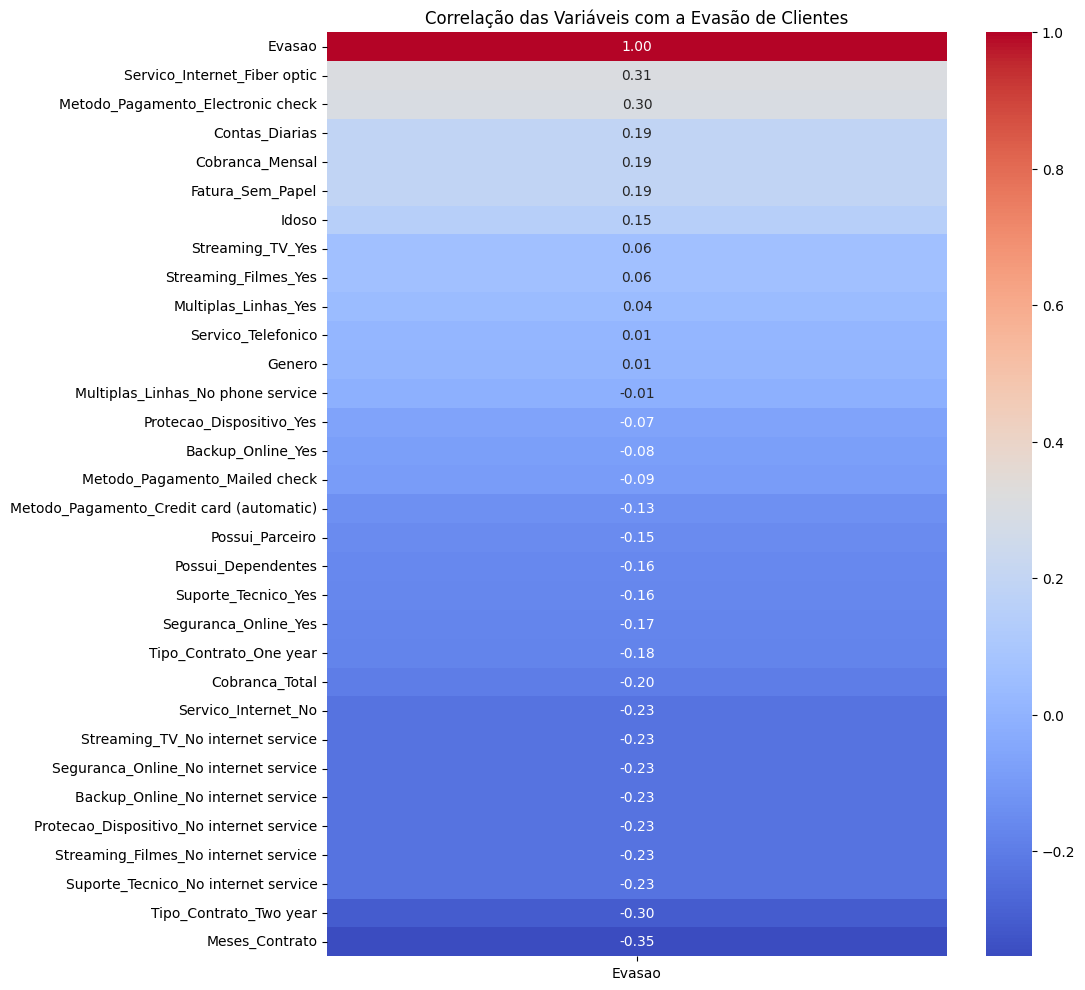

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# ---- PASSO CORRIGIDO ----
# Crie uma cópia do DataFrame sem a coluna de ID para a análise
df_para_analise = df_transformado.drop(columns=['ID_Cliente'])

# Agora, calcule a correlação usando este novo DataFrame sem o ID
correlacoes = df_para_analise.corr()['Evasao'].sort_values(ascending=False)
# -------------------------

print("\n--- Correlação das Variáveis com a Evasão ---")
display(correlacoes)

# O código para o gráfico (heatmap) também usará o df_para_analise
plt.figure(figsize=(10, 12))
# Usamos .corr() novamente aqui no dataframe já filtrado
sns.heatmap(df_para_analise.corr()[['Evasao']].sort_values(by='Evasao', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação das Variáveis com a Evasão de Clientes')
plt.show()

**Visualizando a Distribuição das Variáveis Numéricas por Evasão**

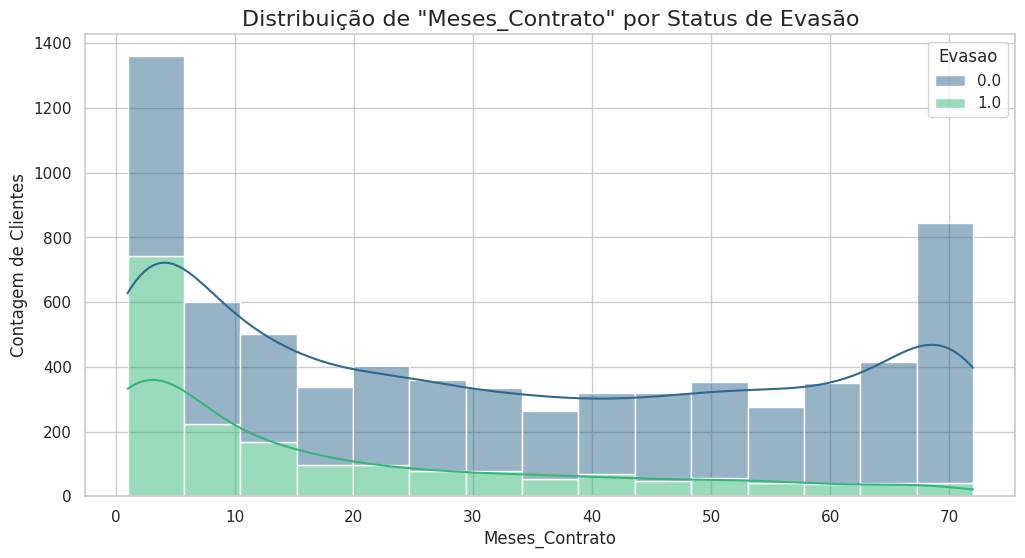

/tmp/ipython-input-38-2338976259.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_transformado, x='Evasao', y=var, palette='viridis')


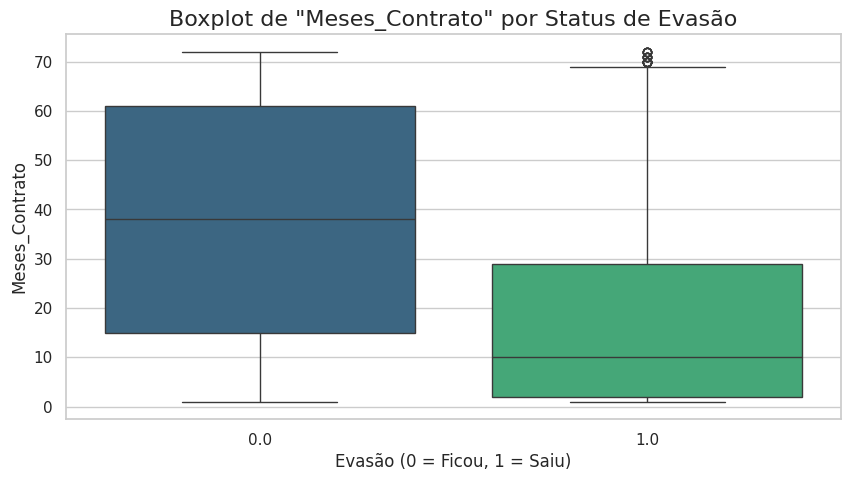

--------------------------------------------------


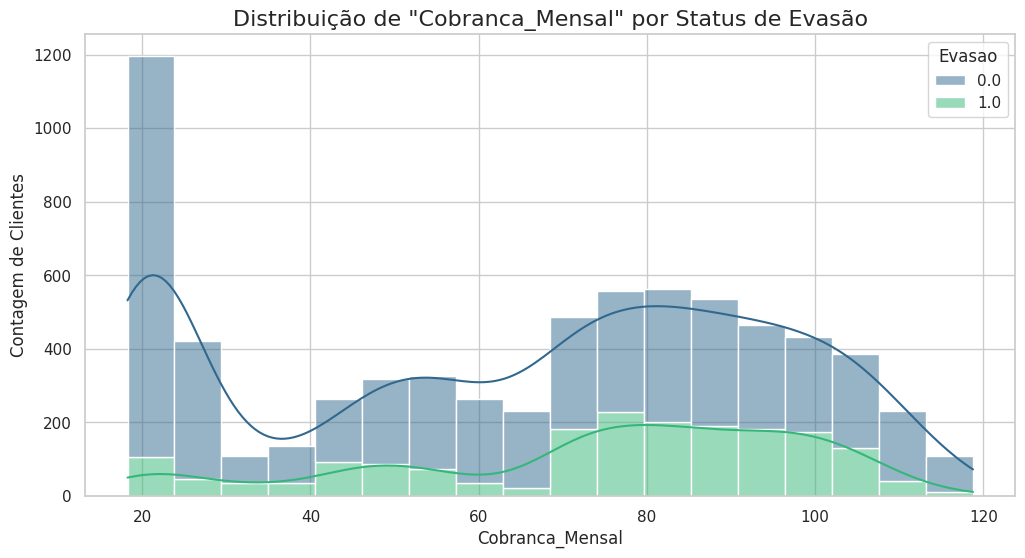

/tmp/ipython-input-38-2338976259.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_transformado, x='Evasao', y=var, palette='viridis')


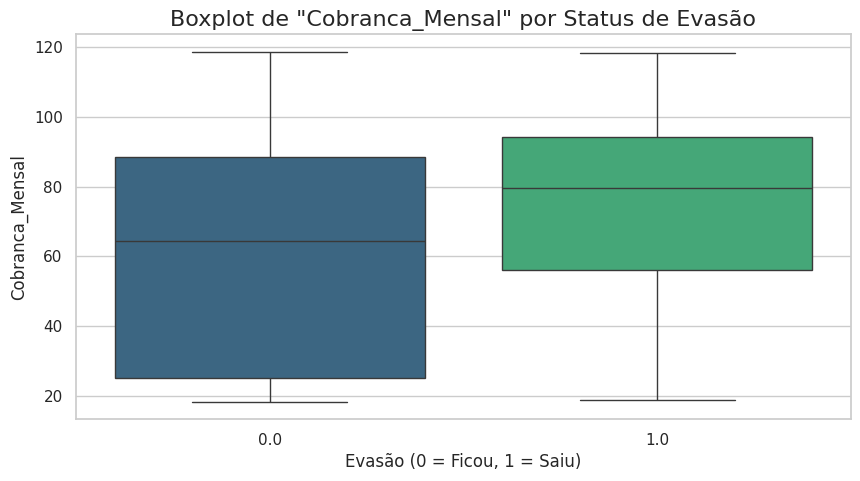

--------------------------------------------------


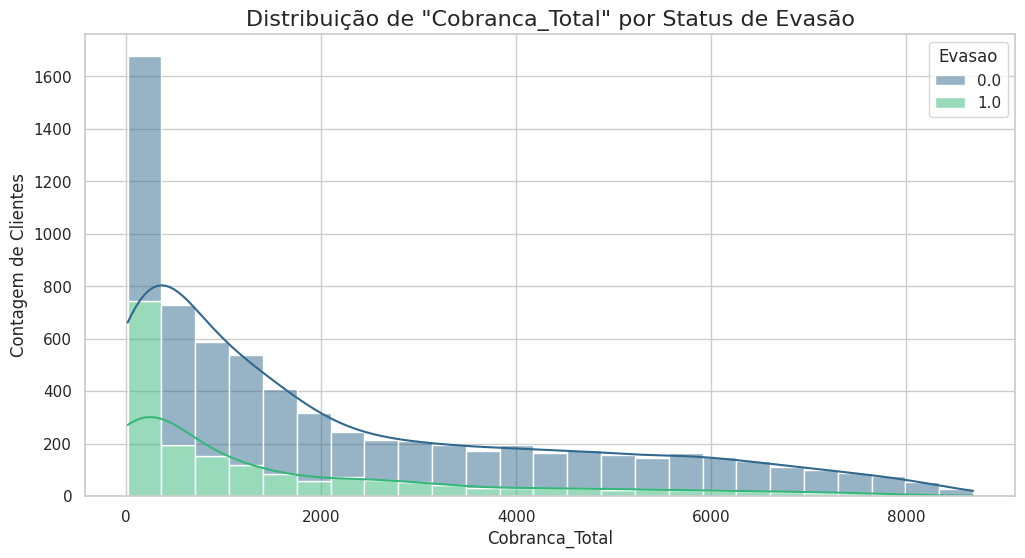

/tmp/ipython-input-38-2338976259.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_transformado, x='Evasao', y=var, palette='viridis')


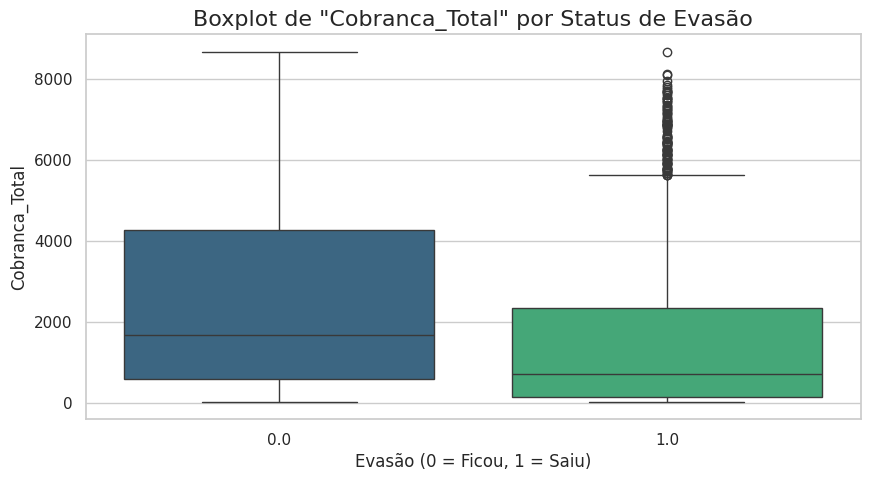

--------------------------------------------------


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que seu DataFrame final se chama 'df_transformado'
# E que as colunas já foram renomeadas para português.

# Lista das variáveis numéricas que queremos analisar
variaveis_numericas = ['Meses_Contrato', 'Cobranca_Mensal', 'Cobranca_Total']

# Configurando o estilo dos gráficos
sns.set(style="whitegrid")

# Criando um gráfico para cada variável numérica
for var in variaveis_numericas:
    plt.figure(figsize=(12, 6))

    # Histograma
    # Onde 'hue' separa o gráfico pela categoria 'Evasao'
    sns.histplot(data=df_transformado, x=var, hue='Evasao', multiple='stack', palette='viridis', kde=True)
    plt.title(f'Distribuição de "{var}" por Status de Evasão', fontsize=16)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Contagem de Clientes', fontsize=12)
    plt.show()

    # Boxplot
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df_transformado, x='Evasao', y=var, palette='viridis')
    plt.title(f'Boxplot de "{var}" por Status de Evasão', fontsize=16)
    plt.xlabel('Evasão (0 = Ficou, 1 = Saiu)', fontsize=12)
    plt.ylabel(var, fontsize=12)
    plt.show()
    print("-" * 50)

# **Relatório Final**

#  relatório Final: Análise de Evasão de Clientes (Churn) da Telecom X

**Autor(a):** [Seu Nome]
<br>
**Data:** 21 de julho de 2025

---

## 🎯 1. Introdução

A evasão de clientes, ou **Churn**, representa um dos maiores desafios para empresas de serviços recorrentes como a Telecom X. Adquirir um novo cliente pode custar significativamente mais do que reter um existente. Portanto, entender os motivos que levam um cliente a cancelar seu serviço é fundamental para a saúde financeira e o crescimento sustentável do negócio.

O objetivo desta análise foi explorar um conjunto de dados de clientes da Telecom X para **identificar os principais fatores e padrões associados à evasão**. A partir dos insights gerados, este relatório propõe recomendações estratégicas e acionáveis para reduzir a taxa de Churn e aumentar a lealdade dos clientes.

---

## 🧹 2. Limpeza e Tratamento de Dados

Para garantir a qualidade e a confiabilidade da análise, os dados brutos passaram por um rigoroso processo de preparação, que incluiu as seguintes etapas:

* **Importação e Estruturação:** Os dados foram carregados diretamente de uma URL no formato JSON. Devido à sua estrutura aninhada, foi utilizada a função `pandas.json_normalize` para converter os dados em um DataFrame tabular padrão, facilitando a manipulação.

* **Correção de Tipos de Dados:** A coluna de cobrança total, que foi inicialmente interpretada como texto, foi convertida para formato numérico. Erros de conversão, correspondentes a clientes novos sem faturamento, foram tratados e identificados como valores ausentes (`NaN`).

* **Tratamento de Dados Ausentes:** As poucas linhas que continham valores ausentes na cobrança total (menos de 0.2% do dataset) foram removidas para não comprometer a integridade das análises estatísticas.

* **Engenharia de Atributos:** Foi criada a coluna `Contas_Diarias` a partir da `Cobranca_Mensal`, normalizando o valor do faturamento para uma taxa diária.

* **Padronização e Transformação:**
    * **Renomeação:** Todas as colunas foram renomeadas para o português, tornando-as mais claras e intuitivas.
    * **Encoding:** Variáveis de texto binárias (como "Yes"/"No") foram convertidas para o formato numérico (1/0) e, para variáveis com múltiplas categorias, foi aplicada a técnica de *One-Hot Encoding*, preparando o dataset para análises e modelagem.

---

## 📊 3. Análise Exploratória de Dados (AED)

A análise dos dados limpos revelou padrões claros e estatisticamente relevantes sobre o comportamento dos clientes.

> A taxa geral de evasão na base de dados analisada é de **26,5%**.

### Principais Achados:

* **Tempo de Contrato vs. Evasão:** Clientes que cancelam o serviço têm um tempo de contrato significativamente menor (média de **18 meses**) em comparação com clientes que permanecem (média de **38 meses**). A evasão é muito mais concentrada nos clientes novos.

* **Custo Mensal vs. Evasão:** Clientes que evadem tendem a ter uma cobrança mensal mais alta (média de **R$74,44**) do que os clientes fiéis (média de **61,28**)

* **Fatores de Risco:** O **Tipo de Contrato Mensal** é o principal indicador de risco. O serviço de **Internet de Fibra Ótica** (geralmente mais caro) também está associado a uma maior taxa de churn.

* **Fatores de Retenção:** **Longo tempo de contrato** e a adesão a **contratos de 1 ou 2 anos** são os fatores que mais contribuem para a retenção de clientes.

*(Os gráficos detalhados que ilustram estas distribuições encontram-se ao longo do notebook.)*

---

## 💡 4. Conclusões e Insights

A análise nos permite traçar um perfil claro do cliente em risco e entender a dinâmica da evasão na Telecom X.

> **O Perfil do Cliente que Evade:** É um **cliente recente**, com **contrato mensal**, que provavelmente paga um **valor mensal mais elevado**. Essa combinação cria um cenário de baixo compromisso e alta sensibilidade ao preço, tornando a decisão de sair muito mais fácil.

A principal vulnerabilidade da empresa reside na falta de um vínculo de longo prazo com uma parcela significativa de seus clientes. Em contrapartida, o cliente fiel é caracterizado pela **longevidade** e pelo **compromisso de longo prazo**.

---

## 🚀 5. Recomendações Estratégicas

Com base nos insights gerados, as seguintes ações são recomendadas para reduzir a taxa de evasão:

1.  **Incentivar Contratos de Longo Prazo:**
    * Criar ofertas agressivas para que clientes de planos mensais migrem para contratos de 1 ou 2 anos, oferecendo descontos ou pequenos upgrades como benefício.

2.  **Foco na Retenção de Novos Clientes:**
    * Implementar um programa de *onboarding* e acompanhamento para clientes nos seus primeiros 6 meses, com pesquisas de satisfação e ofertas de boas-vindas para fortalecer o relacionamento inicial.

3.  **Reavaliar a Oferta de Fibra Ótica:**
    * Investigar por que este serviço apresenta maior churn. Trata-se de uma questão de preço, estabilidade técnica ou expectativas não atendidas?

4.  **Desenvolver um Modelo Preditivo de Churn:**
    * Como próximo passo, utilizar os dados tratados para construir um modelo de Machine Learning. Esse modelo poderá gerar um "score de risco" para cada cliente, permitindo que a equipe de retenção atue de forma proativa.

5.  **Personalizar Ofertas para Grupos de Risco:**
    * Para clientes com faturas altas e contratos mensais, criar ofertas personalizadas de "travamento de preço" por 12 meses para convertê-los em clientes de longo prazo.